In [8]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# Linear model
from sklearn.linear_model import (LogisticRegression, Ridge, Lasso)
# Tree-based method
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              GradientBoostingRegressor, RandomForestRegressor)
from sklearn import tree
# Support vector machine
from sklearn.svm import SVC, LinearSVC, SVR
# Neural network
from sklearn.neural_network import MLPClassifier, MLPRegressor

def scale_data(data):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    #print(scaler)
    scaler.fit(data)
    return scaler.transform(data)

def plot_feature_importances(model, coef, feature_list, ax):
    n_features = len(feature_list)
    #print(len(coef), n_features)
    ax.barh(range(n_features), coef, align='center')
    ax.set_yticks(np.arange(n_features))
    ax.set_yticklabels(feature_list)
    ax.set_xlabel("Feature importance")
    ax.set_title(model)
    plt.ylim(-1, n_features)



Diabetes Dataset

1. Loading Dataset

In [9]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes_data = pd.DataFrame(data = diabetes['data'], columns=diabetes['feature_names'])
diabetes_data['target'] = diabetes['target']
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


2. Exploring Distribution of Data

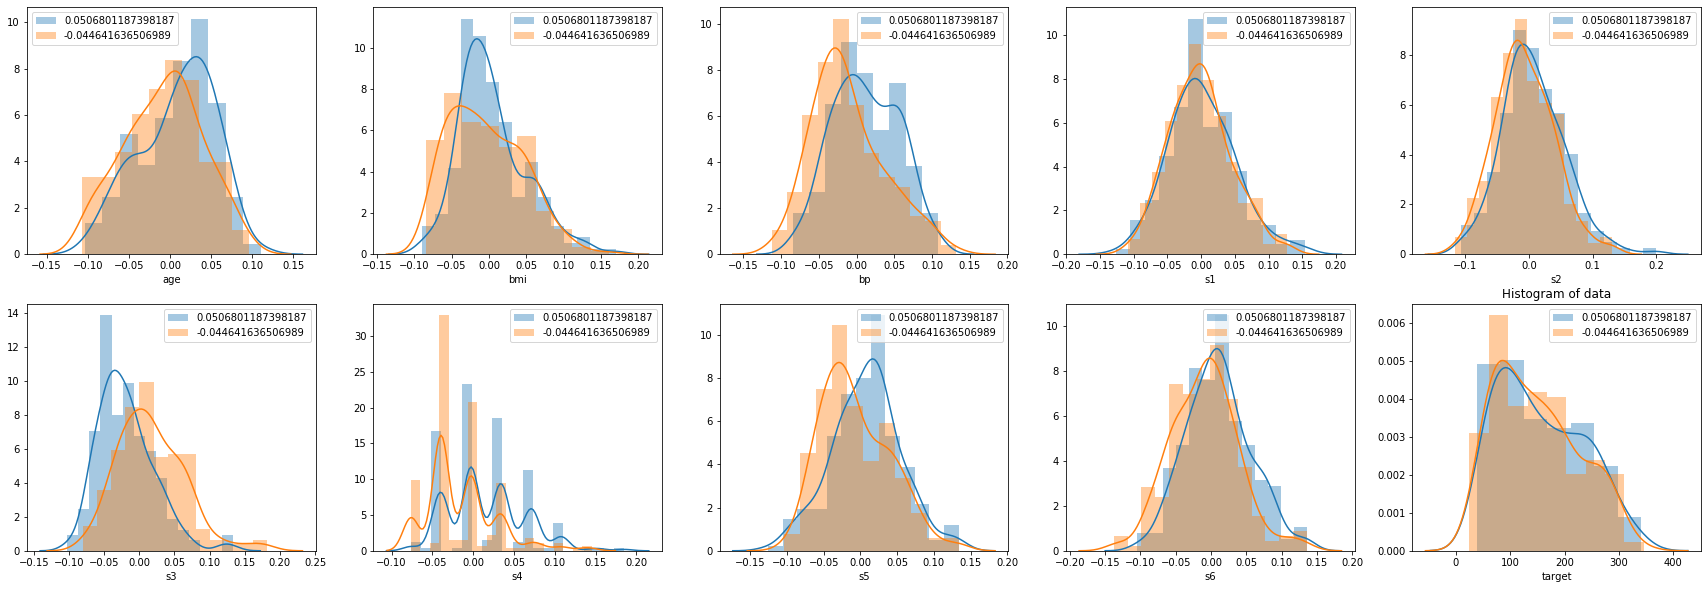

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(30, 10))

feature_to_draw =  [c for c in list(diabetes_data.columns) if c not in ['sex']] 

sex = list(diabetes_data['sex'].unique()) 
for feature, ax in zip(feature_to_draw, axes.reshape(-1)):
    for s in sex:
        sns.distplot(diabetes_data[diabetes_data['sex']==s][feature] , ax = ax, label=str(s))
        ax.legend()
    plt.title('Histogram of data')        

3. Splitting Dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=711)
print(len(X_train),len(X_test))

331 111


4. Training and Testing with Hyperparameter Tuning

In [14]:
model_hyperparameter = {
    
    "K-Nearest Neighbors": 
            {'model': KNeighborsRegressor(),
                 'params': 
                            {
                            'n_neighbors': [1, 5, 10],
                            'leaf_size': [4, 10]
                            }
                           
            },
    
    "Ridge Regression": 
            {'model': Ridge(),
             'params' : 
                            {
                             'alpha': [0.01,0.1,1,10,100]
                            }
                           
            },
             
    "Linear SVR": 
            {'model': SVR(),
             'params': 
                            {
                             'C': [1, 10, 100, 1000],
                             'gamma': [0.001, 0.0001],
                             'kernel': ['linear', 'rbf']
                            }
                           
            },
    "Gradient Boosting Regressor": 
            {'model': GradientBoostingRegressor(),
             'params': 
                            {
                             'learning_rate': [0.05, 0.1],
                             'n_estimators' :[50, 100, 200],
                             'max_depth':[3,1,None]
                            }
                           
            },
    "Decision Tree":
            {'model': tree.DecisionTreeRegressor(),
             'params': 
                            {
                             'max_depth':[3,5,None]
                            }
                             
            },
    "Random Forest": 
            {'model': RandomForestRegressor(),
             'params': 
                            {
                              'n_estimators': [50, 100, 200],
                               'max_depth': [None, 5, 20],
                               'max_features': ['sqrt'] 
                            }
                                         
            },
     "MLP": 
            {'model': MLPRegressor(),
             'params': 
                            {
                              'solver': ['lbfgs'],
                              'hidden_layer_sizes': [[2],[5],[10],[10, 10], [10, 20]]  
                            }
                              
             
            }


}

In [15]:
from sklearn.model_selection import GridSearchCV
col_list = ['Model', 'Best Parameters', 'Train Rsquare', 'Test Rsquare']
df_result_diabete = [] 
model_list_diabete = {} 

for model_name in model_hyperparameter.keys():

    if model_name in ['Ridge Regression', 'MLP']: 
        X_train = scale_data(X_train)
        X_test = scale_data(X_test)
        
    model = model_hyperparameter[model_name]['model']
    param = model_hyperparameter[model_name]['params']
    
    print('='*20,'Train and evaluate on', model_name, '='*20)
    grid_clf = GridSearchCV(model, param, scoring = 'r2', return_train_score=True)
    grid_clf.fit(X_train, y_train)
    
    train_score = grid_clf.score(X_train,y_train) 
    test_score = grid_clf.score(X_test,y_test)
    
    df = pd.DataFrame([[model_name, grid_clf.best_params_, train_score, test_score]], columns=col_list)
    df_result_diabete.append(df)
    
    if model_name in ['Gradient Boosting Regressor' , 'Random Forest', '']:
        model_list_diabete[model_name] = grid_clf.best_estimator_.feature_importances_

summary_table_diabete = pd.concat(df_result_diabete)
summary_table_diabete

==================== Train and evaluate on K-Nearest Neighbors ====================


C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning

==================== Train and evaluate on Ridge Regression ====================
==================== Train and evaluate on Linear SVR ====================


C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


==================== Train and evaluate on Gradient Boosting Regressor ====================


C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\skle

==================== Train and evaluate on Decision Tree ====================
==================== Train and evaluate on Random Forest ====================


C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


==================== Train and evaluate on MLP ====================


C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,Model,Best Parameters,Train Rsquare,Test Rsquare
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 10}",0.528444,0.482590
0,Ridge Regression,{'alpha': 1},0.506660,0.485464
0,Linear SVR,"{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}",0.480956,0.490832
0,Gradient Boosting Regressor,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.581329,0.474388
0,Decision Tree,{'max_depth': 3},0.519200,0.315358
0,Random Forest,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.698085,0.442555
0,MLP,"{'hidden_layer_sizes': [5], 'solver': 'lbfgs'}",0.529417,0.237115


5. Visualizing Results

{'Gradient Boosting Regressor': array([0.01199603, 0.01105816, 0.38899112, 0.11905932, 0.        ,
       0.00235259, 0.05472034, 0.00353643, 0.36156131, 0.0467247 ]), 'Random Forest': array([0.03661678, 0.00559872, 0.26389401, 0.13558533, 0.03209419,
       0.0398471 , 0.07486999, 0.06375999, 0.26834797, 0.07938593])}


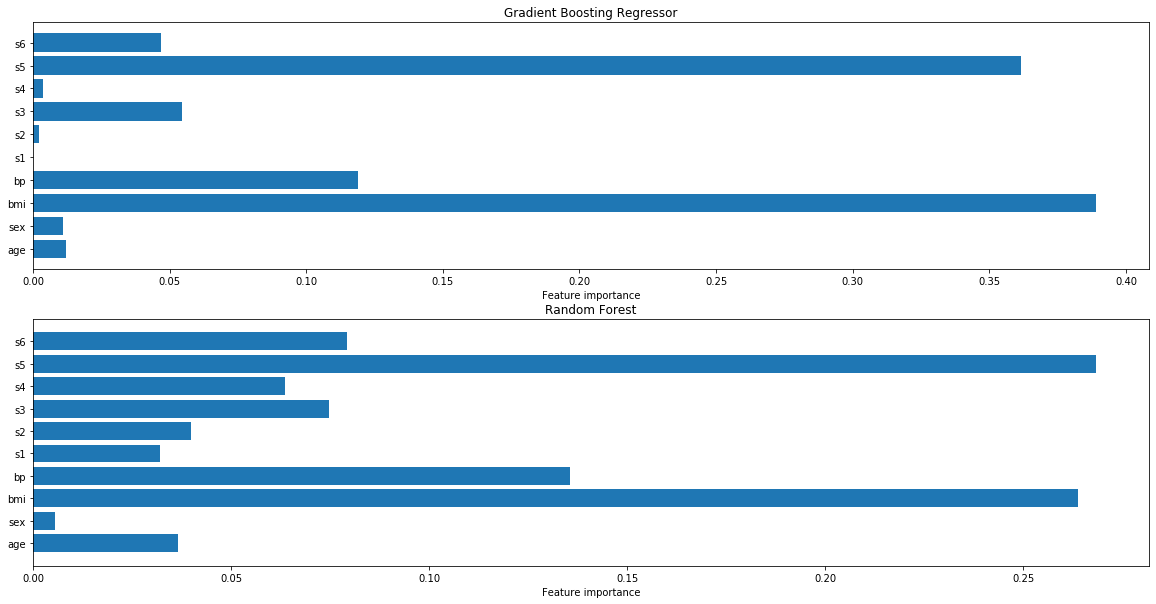

In [16]:
print(model_list_diabete)
fig, axes = plt.subplots(len(model_list_diabete), 1, figsize=(20, 10))
for (model, coef), ax in zip(model_list_diabete.items(),axes):    
    plot_feature_importances(model, coef, diabetes.feature_names,ax = ax)

Wine Dataset

In [ ]:
1. Loading Dataset

In [17]:
wines = datasets.load_wine()
winedata = pd.DataFrame(data = wines['data'], columns=wines['feature_names'])
winedata['target'] = wines['target_names'][wines['target']]
winedata.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


2. Exploring Distribution of Data 

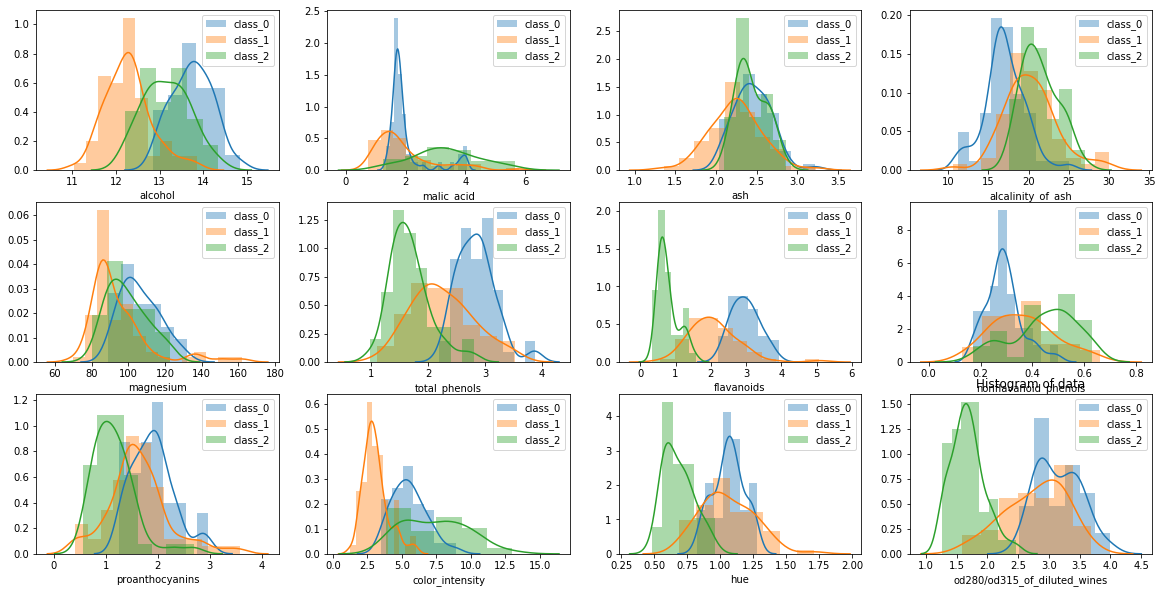

In [18]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10))

feature_to_draw =  [c for c in list(winedata.columns) if c not in ['proline', 'target']] 
for feature, ax in zip(feature_to_draw, axes.reshape(-1)):
    for t in winedata['target'].unique():
        sns.distplot(winedata[winedata['target']==t][feature] , ax = ax, label=t)
    ax.legend()
    plt.title('Histogram of data')        

3. Splitting Dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wines.data, wines.target, stratify=wines.target, random_state=711)
print(len(X_train),len(X_test))

133 45


4. Training and Testing with Hyperparameter Tuning

In [21]:
model_hyperparameter = {
    
    "K-Nearest Neighbors": 
            {'model': KNeighborsClassifier(),
                 'params': 
                            {
                            'n_neighbors': [1, 5, 10],
                            'leaf_size': [4, 10]
                            }
                           
            },
    
    "Logistic Regression": 
            {'model': LogisticRegression(),
             'params' : 
                            {
                             'C': [0.01,0.1,1,10,100],
                            'penalty': ['l1','l2'],
                            }
                           
            },
             
    "Linear SVM": 
            {'model': SVC(),
             'params': 
                            {
                             'C': [1, 10, 100, 1000],
                             'gamma': [0.001, 0.0001],
                             'kernel': ['linear', 'rbf']
                            }
                           
            },
    "Gradient Boosting Classifier": 
            {'model': GradientBoostingClassifier(),
             'params': 
                            {
                             'learning_rate': [0.05, 0.1],
                             'n_estimators' :[50, 100, 200],
                             'max_depth':[3,None]
                            }
                           
            },
    "Decision Tree":
            {'model': tree.DecisionTreeClassifier(),
             'params': 
                            {
                             'max_depth':[3,None]
                            }
                             
            },
    "Random Forest": 
            {'model': RandomForestClassifier(),
             'params': 
                            {
                              'n_estimators': [4,8]  
                            }
                              
             
            }

}

In [23]:
from sklearn.model_selection import GridSearchCV
col_list = ['Model', 'Best Parameters', 'Train Accuracy', 'Test Accuracy']
df_result = []
model_list = {} 

for model_name in model_hyperparameter.keys():

    if model_name in []:
        X_train = scale_data(X_train)
        X_test = scale_data(X_test)
        
    model = model_hyperparameter[model_name]['model']
    param = model_hyperparameter[model_name]['params']
    
    print('='*20,'Train and evaluate on', model_name, '='*20)
    grid_clf = GridSearchCV(model, param, scoring = 'accuracy', return_train_score=True)
    grid_clf.fit(X_train, y_train)
    
    train_score = grid_clf.score(X_train,y_train) 
    test_score = grid_clf.score(X_test,y_test)
    
    df = pd.DataFrame([[model_name, grid_clf.best_params_, train_score, test_score]], columns=col_list)
    df_result.append(df)
    
    if model_name in ['Gradient Boosting Classifier' , 'Random Forest', '']:
        model_list[model_name] = grid_clf.best_estimator_.feature_importances_

summary_table = pd.concat(df_result)
summary_table

==================== Train and evaluate on K-Nearest Neighbors ====================


C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: 

==================== Train and evaluate on Logistic Regression ====================


C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\y

==================== Train and evaluate on Linear SVM ====================


C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


==================== Train and evaluate on Gradient Boosting Classifier ====================


C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


==================== Train and evaluate on Decision Tree ====================
==================== Train and evaluate on Random Forest ====================


C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yiyao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWa

,Model,Best Parameters,Train Accuracy,Test Accuracy
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 1}",1.0,0.755556
0,Logistic Regression,"{'C': 100, 'penalty': 'l1'}",1.0,0.933333
0,Linear SVM,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",1.0,0.977778
0,Gradient Boosting Classifier,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",1.0,0.977778
0,Decision Tree,{'max_depth': None},1.0,0.955556
0,Random Forest,{'n_estimators': 8},1.0,0.977778


5. Visualizing Results

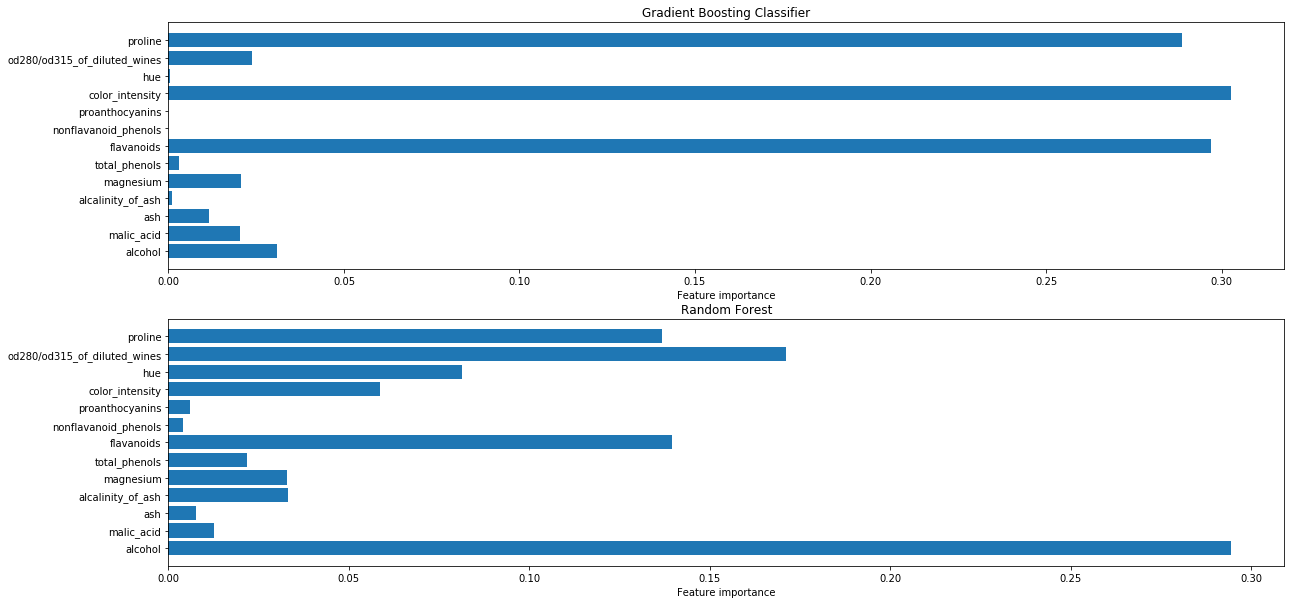

In [24]:
fig, axes = plt.subplots(len(model_list), 1, figsize=(20, 10))
for (model, coef), ax in zip(model_list.items(),axes):    
    plot_feature_importances(model, coef, wines.feature_names,ax = ax)

In [ ]:
Overall Conclusion

In [ ]:
For the Diabetes dataset, while the testing accuracies are relatively low on average for all models, K-Nearest Neighbors, Ridge
Regression, Linear SVM, and Gradient Boosting Classifier appear to perform better than the remaining models.
For the Wine dataset, the Linear SVM, Gradient Boosting Classifier, and Random Forest appear to out-perform the rest of the models.